In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import os
from embeddings import get_embeddings
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
noisy_folder = '/Users/yuda/Desktop/vs_code_projects/labeld_data/noisy'
clean_folder = '/Users/yuda/Desktop/vs_code_projects/labeld_data/clean'


noisy_files = [f"{noisy_folder}/{f}" for f in os.listdir(noisy_folder) if f.endswith('.jpg')]
clean_files = [f"{clean_folder}/{f}" for f in os.listdir(clean_folder) if f.endswith('.jpg')]

# clean = 0, noisy = 1

train_p = 0.5

X_train_names = noisy_files[:int(len(noisy_files) * train_p)] + clean_files[:int(len(clean_files) * train_p)]
y_train_list = ([1 for _ in noisy_files[:int(len(noisy_files) * train_p)]]
                + [0 for _ in clean_files[:int(len(clean_files) * train_p)]])

X_test_names = noisy_files[int(len(noisy_files) * train_p):] + clean_files[int(len(clean_files) * train_p):]
y_test_list = ([1 for _ in noisy_files[int(len(noisy_files) * train_p):]]
            + [0 for _ in clean_files[int(len(clean_files) * train_p):]])

In [3]:
print(len(X_test_names))

58


In [4]:
print(dict(train=y_train_list, test=y_test_list))

{'train': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'test': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [5]:
X_train_list = get_embeddings(X_train_names)
X_test_list = get_embeddings(X_test_names)

In [6]:
X_train: np.ndarray = np.array(X_train_list)
y_train: np.ndarray = np.array(y_train_list)

In [7]:
X_test: np.ndarray = np.array(X_test_list)
y_test: np.ndarray = np.array(y_test_list)

In [8]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [9]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [10]:
clf.predict_proba(X_test)

array([[0.39742611, 0.60257389],
       [0.29504634, 0.70495366],
       [0.31917053, 0.68082947],
       [0.30934704, 0.69065296],
       [0.31385216, 0.68614784],
       [0.32857588, 0.67142412],
       [0.35627421, 0.64372579],
       [0.32227843, 0.67772157],
       [0.41047227, 0.58952773],
       [0.35682308, 0.64317692],
       [0.42673926, 0.57326074],
       [0.35154235, 0.64845765],
       [0.33685975, 0.66314025],
       [0.35526901, 0.64473099],
       [0.38836464, 0.61163536],
       [0.37885698, 0.62114302],
       [0.45771365, 0.54228635],
       [0.39826684, 0.60173316],
       [0.39677002, 0.60322998],
       [0.38256798, 0.61743202],
       [0.39397095, 0.60602905],
       [0.36049694, 0.63950306],
       [0.35057695, 0.64942305],
       [0.3125916 , 0.6874084 ],
       [0.29601008, 0.70398992],
       [0.51326458, 0.48673542],
       [0.4003253 , 0.5996747 ],
       [0.44866904, 0.55133096],
       [0.3209254 , 0.6790746 ],
       [0.44004885, 0.55995115],
       [0.

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def show_images(images_list, prediction, target):
    """
    Display images with their predictions and target labels.
    Supports both image file paths and numpy arrays.
    """

    num_images = len(images_list)
    cols = min(5, num_images)
    rows = (num_images // cols) + (num_images % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten() if num_images > 1 else [axes]

    for i in range(num_images):
        # Load image if it's a file path (string)
        img = Image.open(images_list[i]) if isinstance(images_list[i], str) else images_list[i]
        img = np.array(img)  # Convert to NumPy array for `imshow`

        axes[i].imshow(img, cmap="gray" if len(img.shape) == 2 else None)
        axes[i].axis("off")
        axes[i].set_title(f"Pred: {prediction[i]}\nTarget: {target[i]}", fontsize=10)

    plt.tight_layout()
    plt.show()

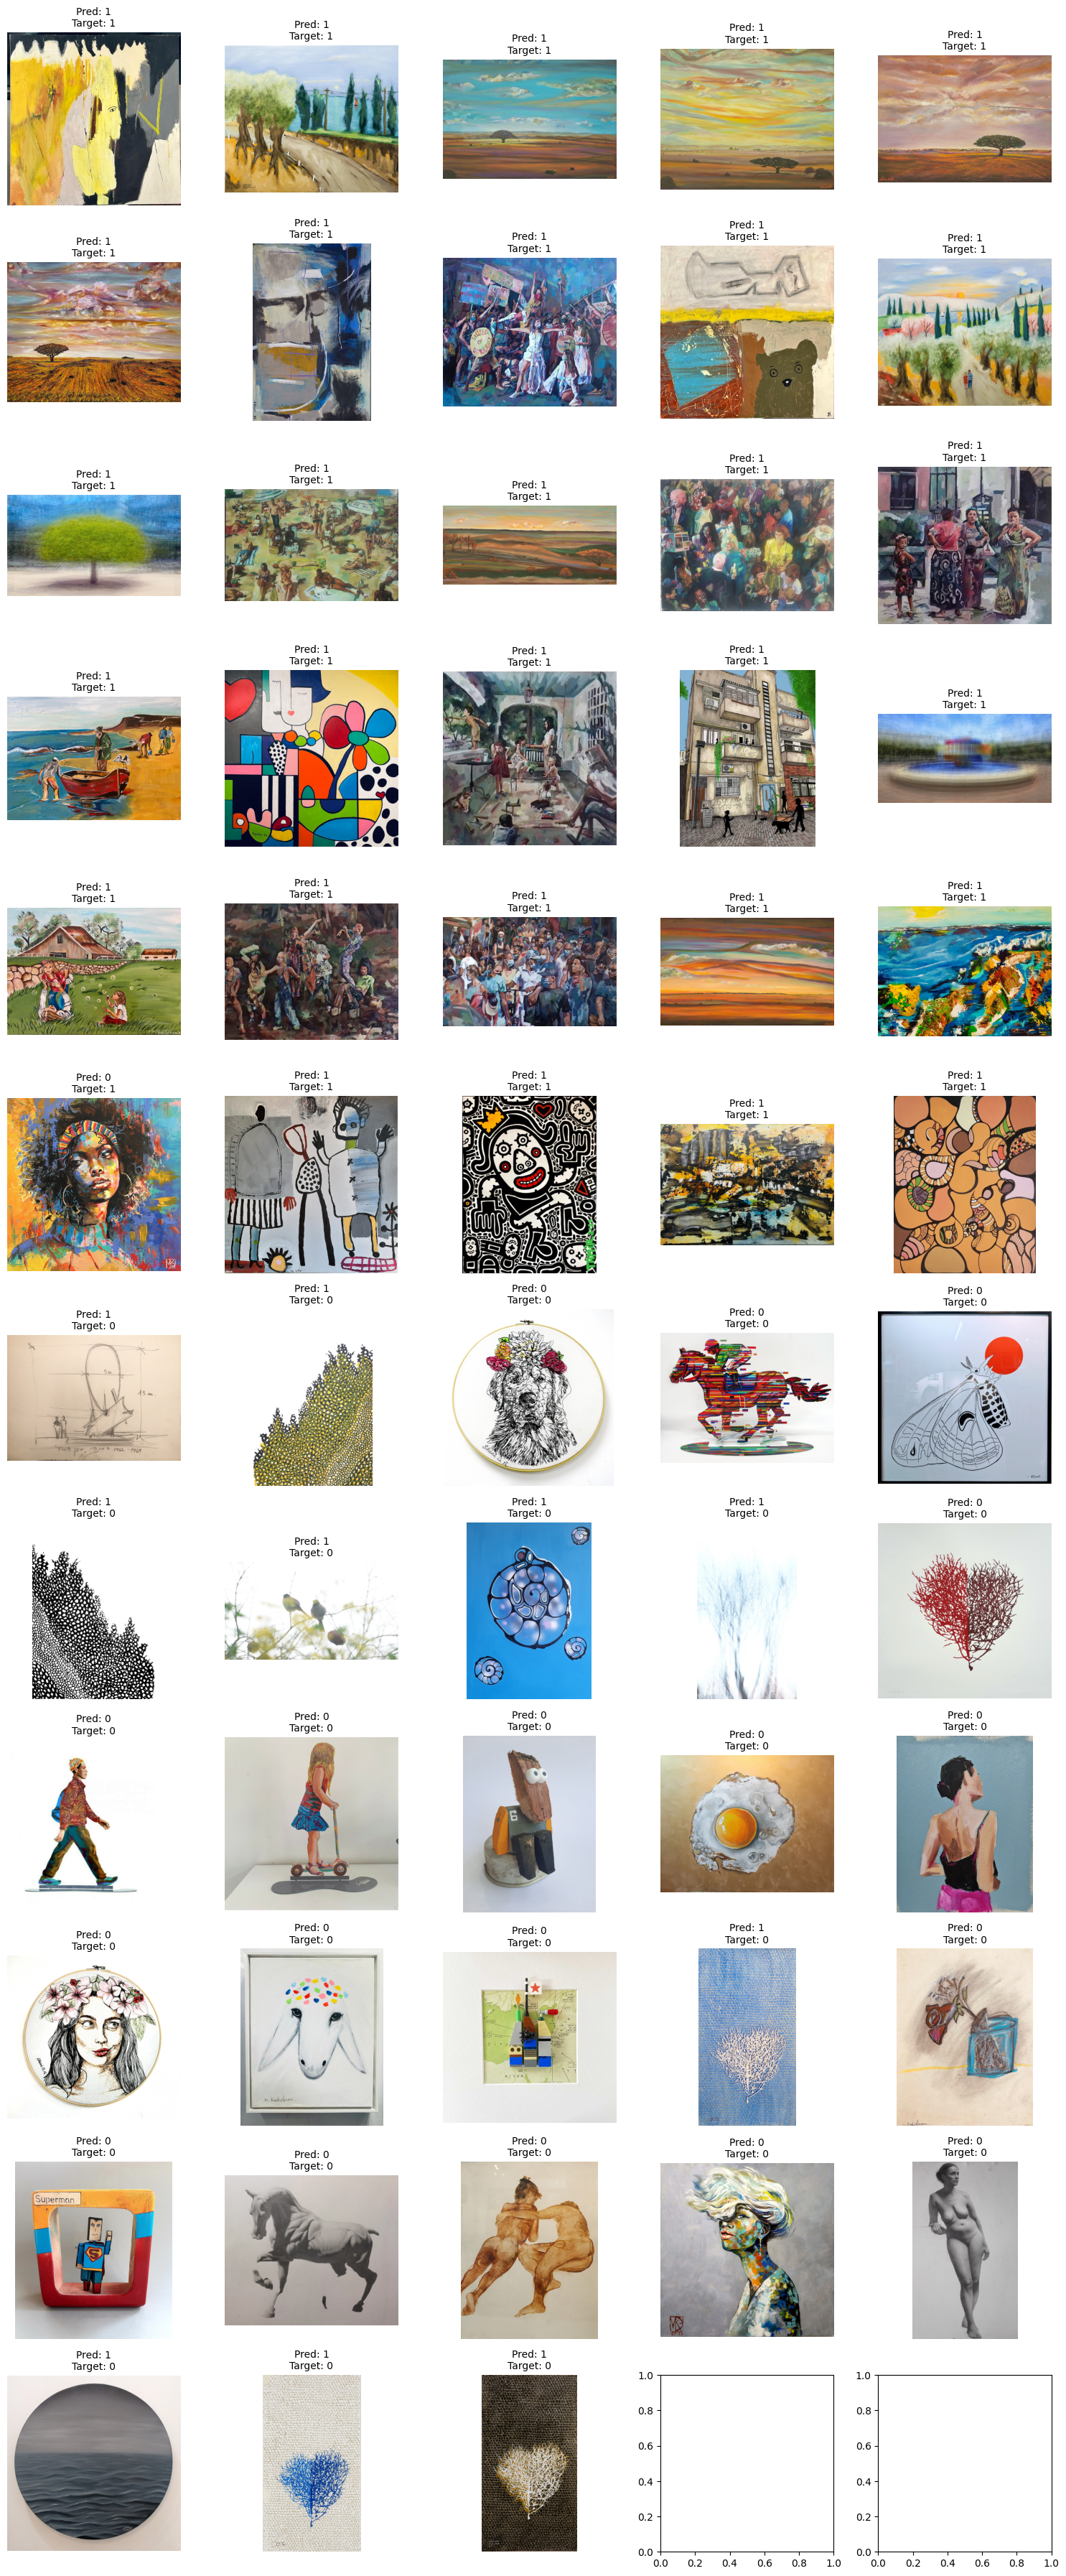

In [12]:
show_images(X_test_names, list(predictions), y_test_list)

In [13]:
accuracy_score(predictions, y_test)

0.8103448275862069

In [14]:
train_predictions = clf.predict(X_train)
accuracy_score(train_predictions, y_train)

0.9824561403508771

# regression

In [15]:
rgr = LinearRegression().fit(X_train, y_train)

In [16]:
predictions = rgr.predict(X_test)
preds = np.digitize(predictions, bins=[0.5])
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
accuracy_score(preds, y_test)

0.9655172413793104

In [21]:
predictions = rgr.predict(X_train)
print(predictions)
preds = np.digitize(predictions, bins=[0.5])
preds

[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.11022302e-15 -3.16413562e-15
 -1.22124533e-15 -3.88578059e-16 -2.55351296e-15 -9.43689571e-16
  3.33066907e-15 -1.60982339e-15 -8.88178420e-16 -1.55431223e-15
 -8.88178420e-16 -6.10622664e-16 -1.11022302e-15 -1.11022302e-15
 -4.44089210e-16  3.21964677e-15  6.66133815e-16  6.10622664e-16
  1.11022302e-16 -6.66133815e-16 -5.55111512e-16 -8.88178420e-16
  5.55111512e-17  1.33226763e-15 -9.99200722e-16 -2.27595720e-15
 -1.60982339e-15]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
accuracy_score(preds, y_train)


1.0

In [20]:
# import joblib
# joblib.dump(rgr, "linear_regression_model.pkl")

['linear_regression_model.pkl']